<a href="https://colab.research.google.com/github/shruti629/Deep-Health-Analysis-and-Disease-Prediction/blob/main/Stroke_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

 In medicine, a loss of blood flow to part of the brain, which damages brain tissue. Strokes are caused by blood clots and broken blood vessels in the brain. Symptoms include dizziness, numbness, weakness on one side of the body, and problems with talking, writing, or understanding language.

**Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
#Import Important Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [ ]:
st=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
st.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    st[column] = le.fit_transform(st[column])

In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [ ]:
st.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
st.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In BMI has 201 NAN values,which will be replace by mean value

In [ ]:
st['bmi'].fillna(st['bmi'].mean(),inplace=True)

In [ ]:
st.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

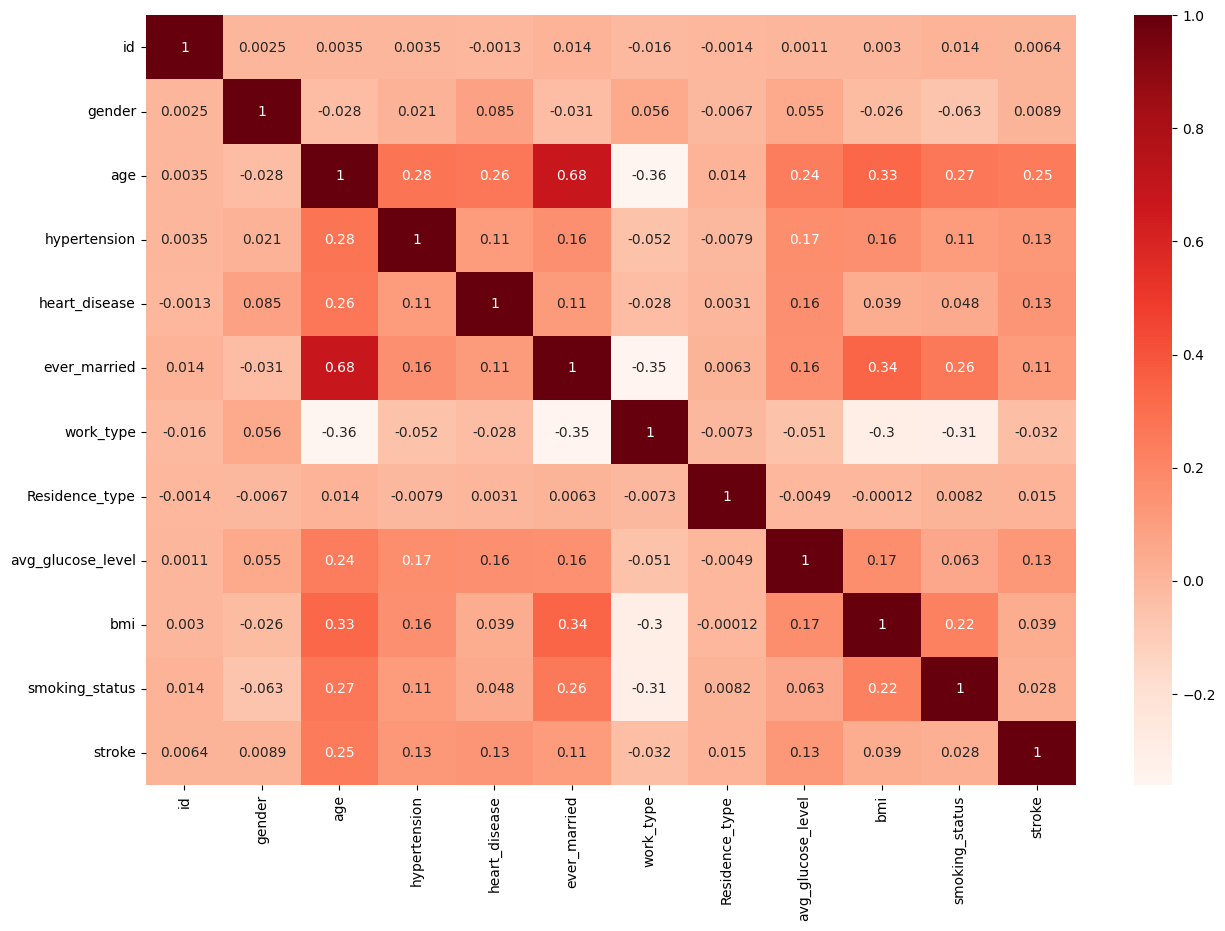

In [ ]:
plt.figure(figsize=[15,10])
rt=st.corr()
sns.heatmap(rt,annot=True,ax=plt.gca(),cmap='Reds')

In [ ]:
X=st.drop(columns=['stroke',"id"])
Y=st['stroke']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.33)
X_train.shape,X_test.shape

((3423, 10), (1687, 10))

**Decision Tree Classifier**

In [ ]:
df=DecisionTreeClassifier(random_state=0)
# train the model
df.fit(X_train,Y_train)
# make predictions
df_Pred=df.predict(X_test)
# print the accuracy
print(accuracy_score(Y_test,df_Pred))

0.919383521043272


In [ ]:
print(confusion_matrix(Y_test,df_Pred))

[[1535   75]
 [  61   16]]


In [ ]:
print(classification_report(Y_test,df_Pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1610
           1       0.18      0.21      0.19        77

    accuracy                           0.92      1687
   macro avg       0.57      0.58      0.57      1687
weighted avg       0.93      0.92      0.92      1687



In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

**Support Vector Machine**

In [ ]:
svm_clf = svm.SVC()
clf=(svm_clf,parameters)

In [ ]:
# train the model
svm_clf.fit(X_train, Y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)
# print the accuracy
print(accuracy_score(Y_test, svm_clf_pred))

0.9543568464730291


In [ ]:
print(classification_report(Y_test,svm_clf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1610
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
pickle.dump(clf,open("svm_clf",'wb'))